 1. Run a simple linear regression relating the species richness with each one of the continuous environmental variables in the dataset: Altitude, Actual_river_slope, Elevation_mean_catch, prec_ann_catch, temp_ann, temp_jan, temp_jul. Before running the analyses, check if any of the variables requires to be transformed and apply the appropriate transformation. Compute the regression coefficient estimates, the r-square and the F-statistics. You may plot the fitted model.


In [23]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import scipy.stats as sts
import scikit_posthocs as sp
import statsmodels.stats as stm
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.graphics.gofplots import qqplot
from pdpbox import pdp


In [24]:
#load dataset
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df=df.dropna()


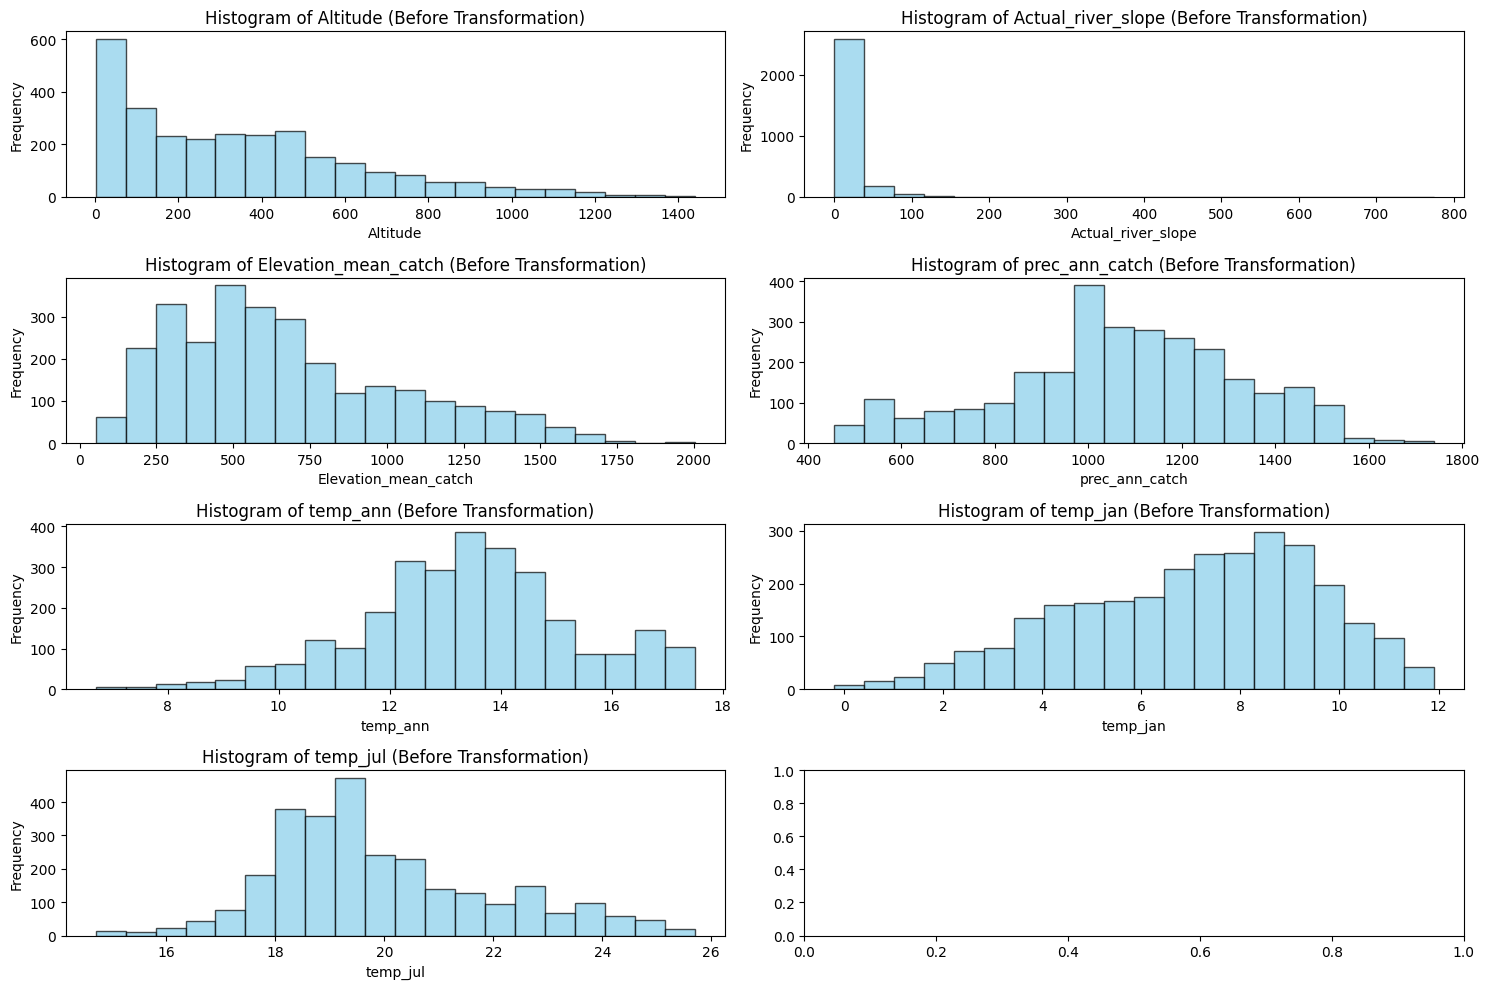

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Selecting the relevant continuous variables
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 
                   'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

#checking variables for skewness

# Create a grid of plots for histograms
num_plots = len(continuous_vars)
cols = 2  # Number of columns in the grid
rows = (num_plots + 1) // cols  # Number of rows in the grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes if necessary
if rows == 1:
    axes = [axes]

# Check for skewness in each continuous variable and apply appropriate transformation if needed
for i, var in enumerate(continuous_vars):
    # Plot histogram to visualize skewness before transformation
    ax = axes[i // cols][i % cols]
    ax.hist(df[var], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f"Histogram of {var} (Before Transformation)")
    ax.set_xlabel(var)
    ax.set_ylabel("Frequency")

    if np.abs(df[var].skew()) > 1:  # Checking if skewness is greater than 1
        df[var] = np.log1p(df[var])  # Applying log transformation if skewness is high

# Tight layout to adjust subplot parameters for better layout
plt.tight_layout()

# Drop rows with NaN values
df.dropna(inplace=True)

# Show the plots
plt.show()



In [32]:
#transforming skewed variables
#only applying transformations to variables that are skewed (so not symmetric around central point)
skewed_variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'temp_ann']
for var in skewed_variables:
    df[var] = np.log1p(df[var])

df.dropna(inplace=True) 

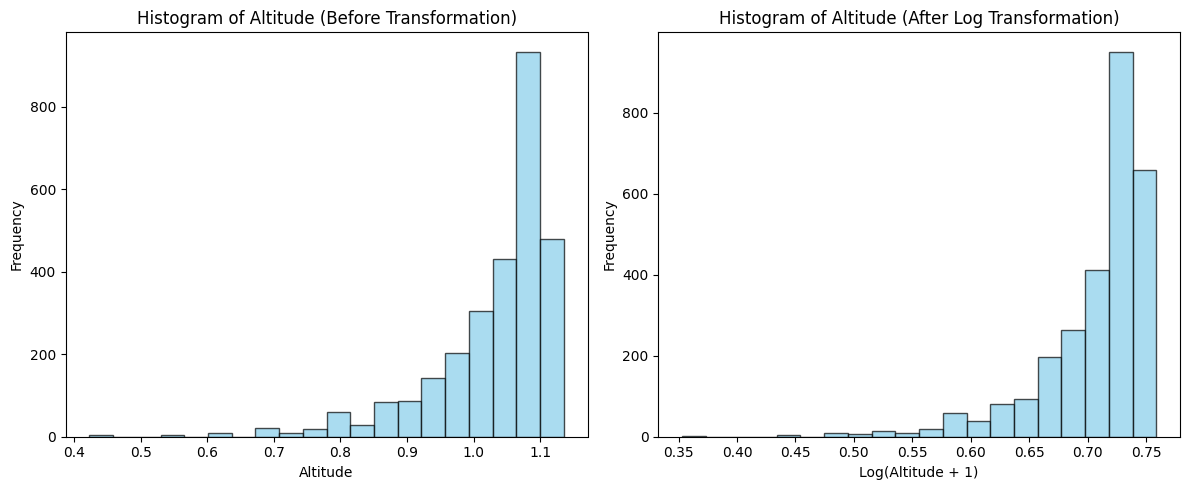

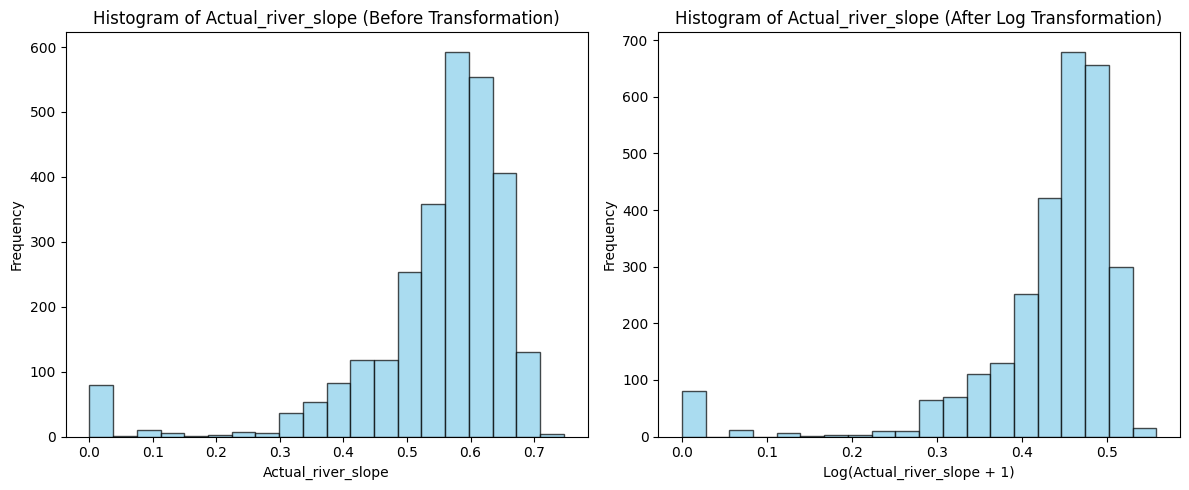

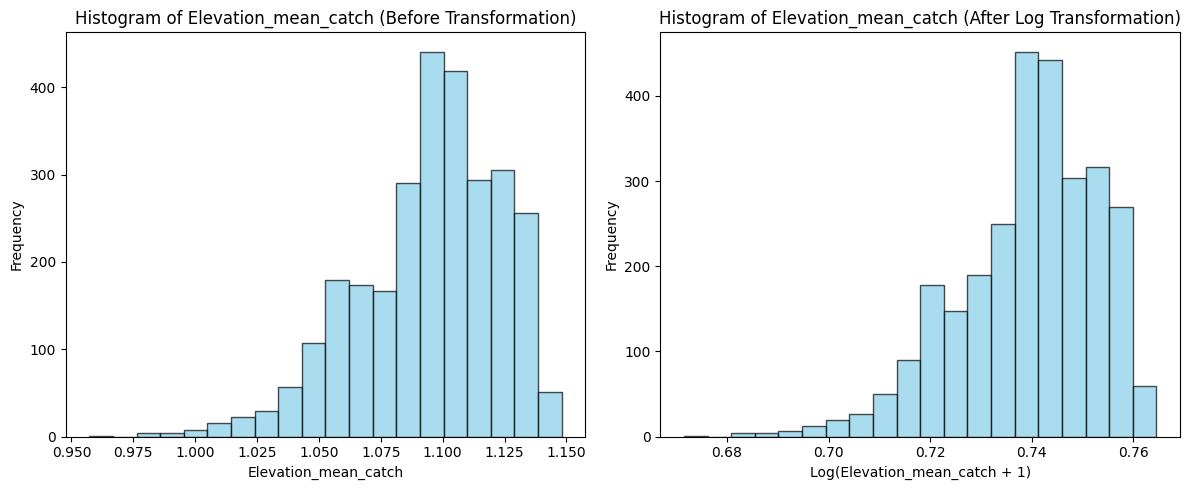

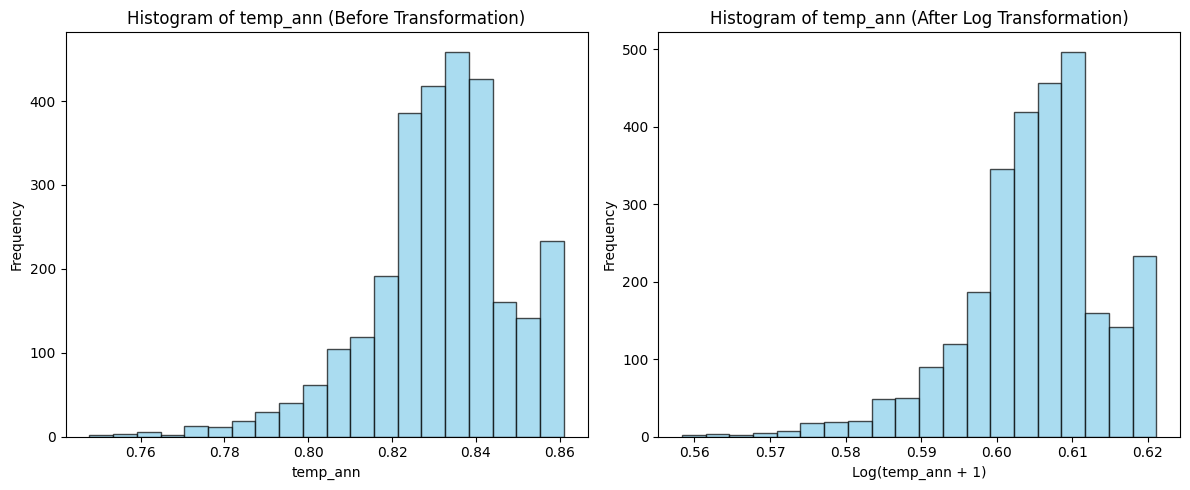

In [33]:
# Skewed variables
skewed_variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'temp_ann']

# Plot histograms before and after transformation
for var in skewed_variables:
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram before transformation
    axes[0].hist(df[var], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].set_title(f"Histogram of {var} (Before Transformation)")
    axes[0].set_xlabel(var)
    axes[0].set_ylabel("Frequency")

    # Apply log transformation 
    # why? bc data skewed to the right side
    df[var + '_log'] = np.log1p(df[var])

    # Histogram after transformation
    axes[1].hist(df[var + '_log'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[1].set_title(f"Histogram of {var} (After Log Transformation)")
    axes[1].set_xlabel(f"Log({var} + 1)")
    axes[1].set_ylabel("Frequency")

    # Show plots
    plt.tight_layout()
    plt.show()

In [28]:
#species richness column
df['Species_richness'] = df.iloc[:, 56:].gt(0).sum(axis=1) #from last assignment

In [29]:
#handle missing values again
df2 = df.dropna()

I think the code below needs work, why is R squared = 'infinite'for all the tests? Also, I feel like the graphs don't tell us much, it is too clustered together right?

Regression Summary for Altitude:
                            OLS Regression Results                            
Dep. Variable:       Species_richness   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     532.5
Date:                Thu, 09 May 2024   Prob (F-statistic):          4.61e-108
Time:                        20:29:22   Log-Likelihood:                -6268.8
No. Observations:                2822   AIC:                         1.254e+04
Df Residuals:                    2820   BIC:                         1.255e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.44

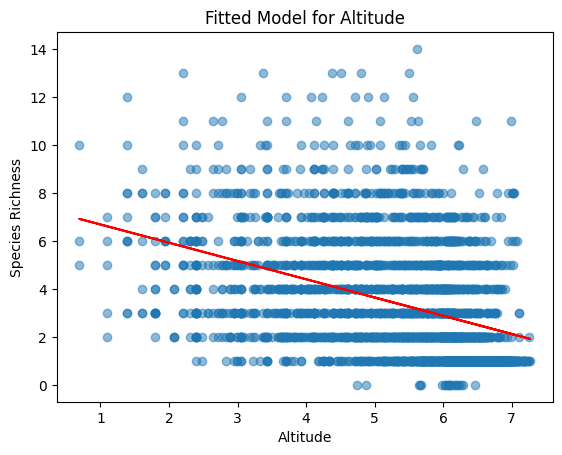

Regression Summary for Actual_river_slope:
                            OLS Regression Results                            
Dep. Variable:       Species_richness   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     668.6
Date:                Thu, 09 May 2024   Prob (F-statistic):          1.79e-132
Time:                        20:29:23   Log-Likelihood:                -6212.6
No. Observations:                2822   AIC:                         1.243e+04
Df Residuals:                    2820   BIC:                         1.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

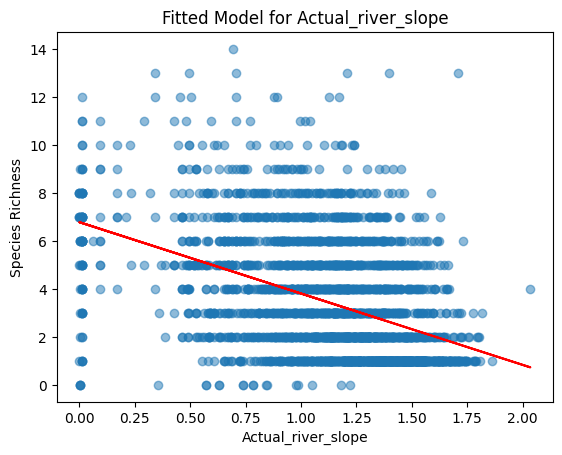

Regression Summary for Elevation_mean_catch:
                            OLS Regression Results                            
Dep. Variable:       Species_richness   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     230.7
Date:                Thu, 09 May 2024   Prob (F-statistic):           3.82e-50
Time:                        20:29:23   Log-Likelihood:                -6401.9
No. Observations:                2822   AIC:                         1.281e+04
Df Residuals:                    2820   BIC:                         1.282e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

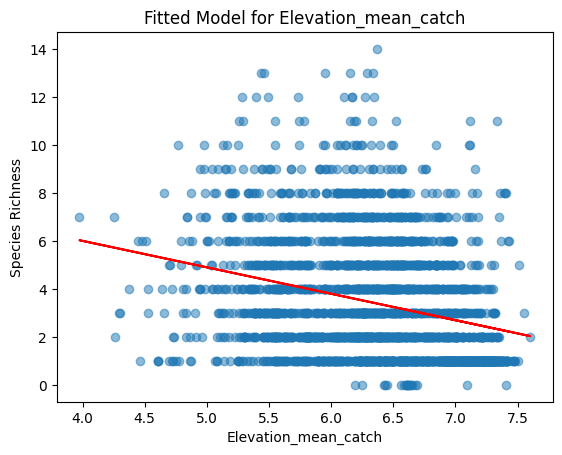

Regression Summary for prec_ann_catch:
                            OLS Regression Results                            
Dep. Variable:       Species_richness   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     212.7
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.66e-46
Time:                        20:29:23   Log-Likelihood:                -6410.2
No. Observations:                2822   AIC:                         1.282e+04
Df Residuals:                    2820   BIC:                         1.284e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const

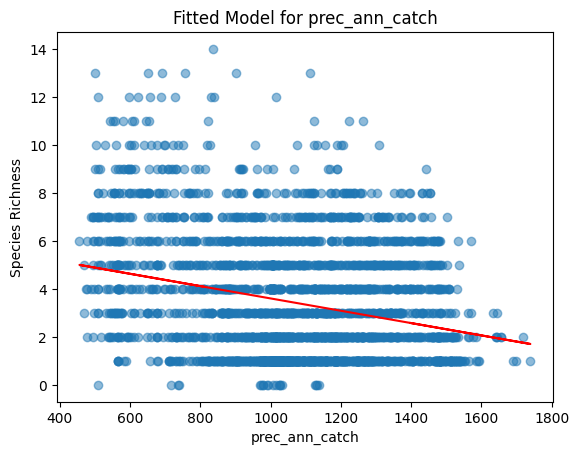

Regression Summary for temp_ann:
                            OLS Regression Results                            
Dep. Variable:       Species_richness   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     1041.
Date:                Thu, 09 May 2024   Prob (F-statistic):          1.11e-194
Time:                        20:29:23   Log-Likelihood:                -6069.5
No. Observations:                2822   AIC:                         1.214e+04
Df Residuals:                    2820   BIC:                         1.215e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.98

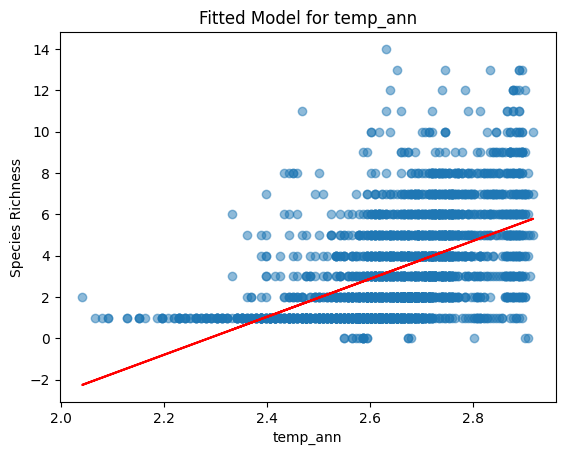

Regression Summary for temp_jan:
                            OLS Regression Results                            
Dep. Variable:       Species_richness   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     410.5
Date:                Thu, 09 May 2024   Prob (F-statistic):           2.55e-85
Time:                        20:29:24   Log-Likelihood:                -6321.1
No. Observations:                2822   AIC:                         1.265e+04
Df Residuals:                    2820   BIC:                         1.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.91

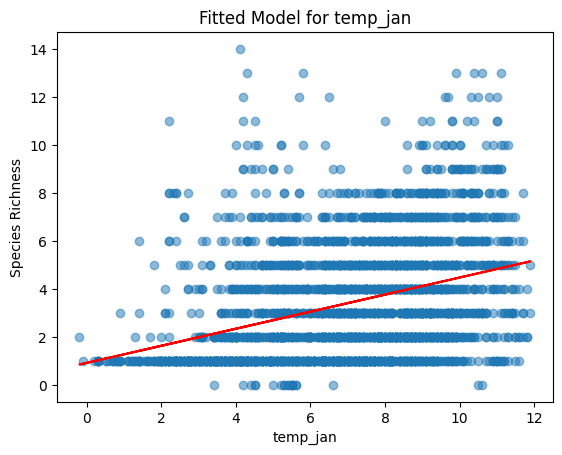

Regression Summary for temp_jul:
                            OLS Regression Results                            
Dep. Variable:       Species_richness   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     1412.
Date:                Thu, 09 May 2024   Prob (F-statistic):          6.32e-251
Time:                        20:29:24   Log-Likelihood:                -5940.0
No. Observations:                2822   AIC:                         1.188e+04
Df Residuals:                    2820   BIC:                         1.190e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.43

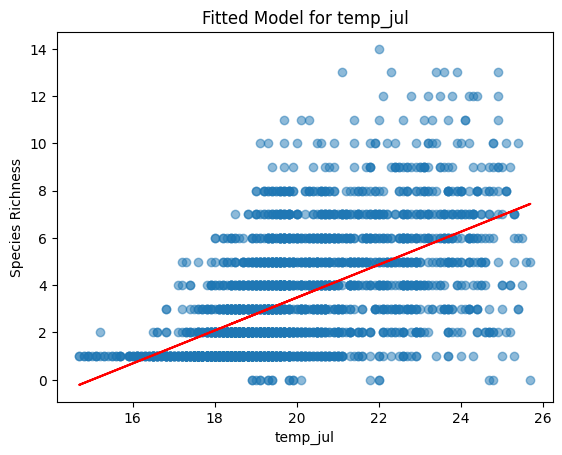

In [38]:
# run simple linear regression for each continuous variable
for var in continuous_vars:
    X = sm.add_constant(df2[var])  # Adding constant to the predictor variable
    y = df2['Species_richness']    # Response variable

    model = sm.OLS(y, X).fit()  # Fit the linear regression model, use the OLS approach to estimate theoretical model
    predictions = model.predict(X)  # Get predictions

    # Print regression summary
    print(f"Regression Summary for {var}:")
    print(model.summary())

    # Plotting fitted model
    plt.scatter(df2[var], df['Species_richness'], alpha=0.5)  # Scatter plot of df points
    plt.plot(df2[var], predictions, color='red')  # Fitted line
    plt.title(f"Fitted Model for {var}")
    plt.xlabel(var)
    plt.ylabel("Species Richness")
    plt.show()

Here we tried running a linear regression but using a GLM test. I think the results look better?

Regression Summary for Altitude:
                 Generalized Linear Model Regression Results                  
Dep. Variable:       Species_richness   No. Observations:                 2822
Model:                            GLM   Df Residuals:                     2820
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          4.9810
Method:                          IRLS   Log-Likelihood:                -6268.8
Date:                Thu, 09 May 2024   Deviance:                       14046.
Time:                        20:25:48   Pearson chi2:                 1.40e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1720
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.44

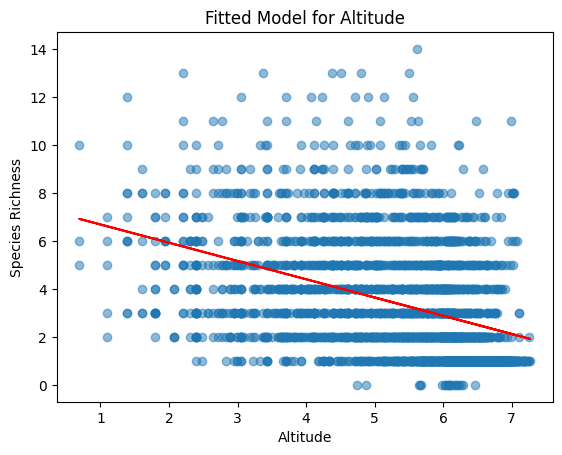

Regression Summary for Actual_river_slope:
                 Generalized Linear Model Regression Results                  
Dep. Variable:       Species_richness   No. Observations:                 2822
Model:                            GLM   Df Residuals:                     2820
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          4.7867
Method:                          IRLS   Log-Likelihood:                -6212.6
Date:                Thu, 09 May 2024   Deviance:                       13498.
Time:                        20:25:48   Pearson chi2:                 1.35e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2109
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

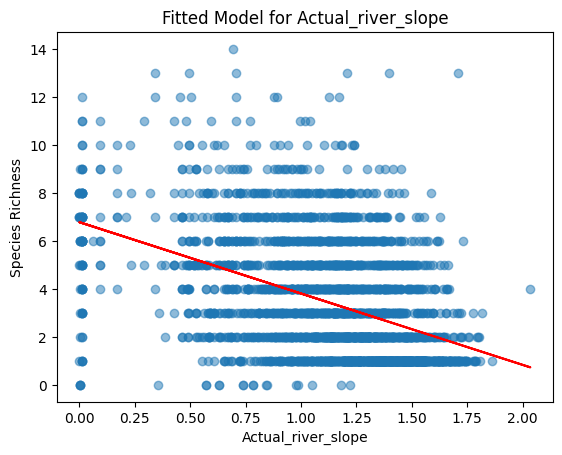

Regression Summary for Elevation_mean_catch:
                 Generalized Linear Model Regression Results                  
Dep. Variable:       Species_richness   No. Observations:                 2822
Model:                            GLM   Df Residuals:                     2820
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          5.4737
Method:                          IRLS   Log-Likelihood:                -6401.9
Date:                Thu, 09 May 2024   Deviance:                       15436.
Time:                        20:25:48   Pearson chi2:                 1.54e+04
No. Iterations:                     3   Pseudo R-squ. (CS):            0.07850
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

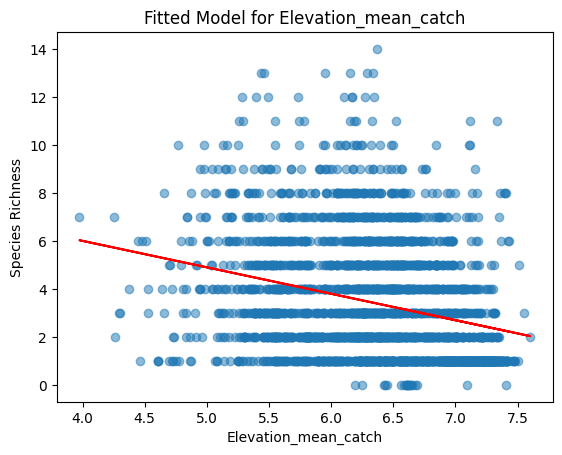

Regression Summary for prec_ann_catch:
                 Generalized Linear Model Regression Results                  
Dep. Variable:       Species_richness   No. Observations:                 2822
Model:                            GLM   Df Residuals:                     2820
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          5.5062
Method:                          IRLS   Log-Likelihood:                -6410.2
Date:                Thu, 09 May 2024   Deviance:                       15527.
Time:                        20:25:48   Pearson chi2:                 1.55e+04
No. Iterations:                     3   Pseudo R-squ. (CS):            0.07261
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const

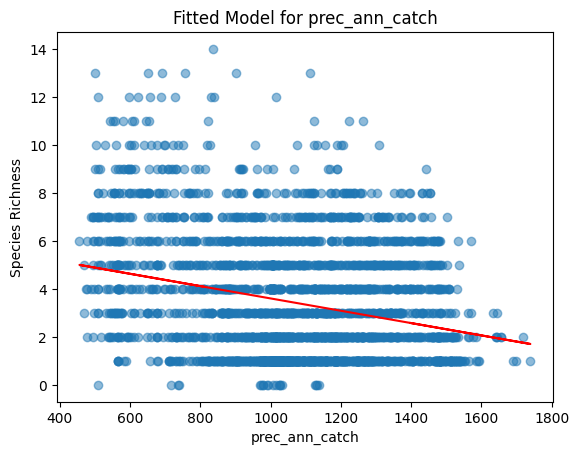

Regression Summary for temp_ann:
                 Generalized Linear Model Regression Results                  
Dep. Variable:       Species_richness   No. Observations:                 2822
Model:                            GLM   Df Residuals:                     2820
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          4.3248
Method:                          IRLS   Log-Likelihood:                -6069.5
Date:                Thu, 09 May 2024   Deviance:                       12196.
Time:                        20:25:49   Pearson chi2:                 1.22e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3085
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.98

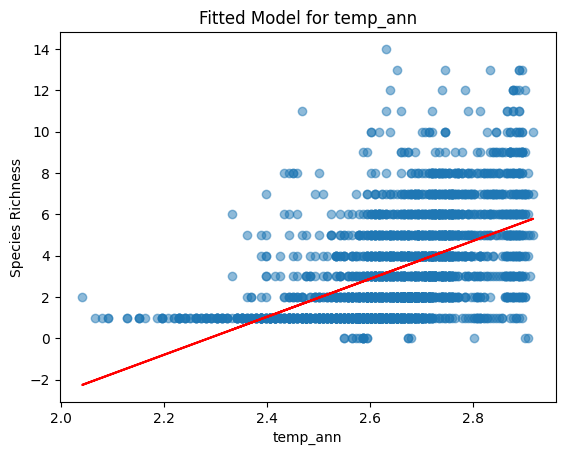

Regression Summary for temp_jan:
                 Generalized Linear Model Regression Results                  
Dep. Variable:       Species_richness   No. Observations:                 2822
Model:                            GLM   Df Residuals:                     2820
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          5.1691
Method:                          IRLS   Log-Likelihood:                -6321.1
Date:                Thu, 09 May 2024   Deviance:                       14577.
Time:                        20:25:49   Pearson chi2:                 1.46e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1354
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.91

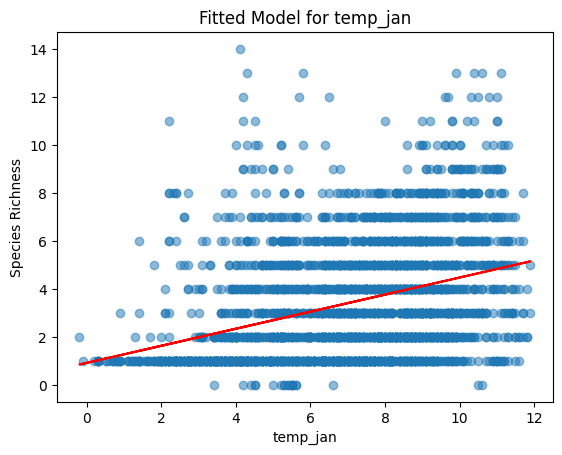

Regression Summary for temp_jul:
                 Generalized Linear Model Regression Results                  
Dep. Variable:       Species_richness   No. Observations:                 2822
Model:                            GLM   Df Residuals:                     2820
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          3.9456
Method:                          IRLS   Log-Likelihood:                -5940.0
Date:                Thu, 09 May 2024   Deviance:                       11126.
Time:                        20:25:50   Pearson chi2:                 1.11e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3937
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.43

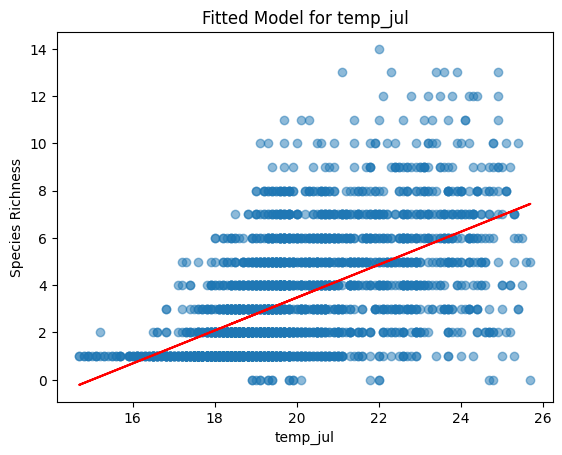

In [34]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Import GLM from statsmodels
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gaussian

# Assuming df2 contains your dataset and continuous_vars is a list of continuous variables
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 
                   'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Dropping rows with missing data
df2 = df2.dropna()

# Run simple linear regression for each continuous variable
for var in continuous_vars:
    X = sm.add_constant(df2[var])  # Adding constant to the predictor variable
    y = df2['Species_richness']    # Response variable


    # Fit the linear regression model using GLM with Gaussian family
    model = GLM(y, X, family=Gaussian()).fit()

    # Check for convergence
    if not model.converged:
        print(f"Warning: Model did not converge for {var}")

    # Get predictions
    predictions = model.predict(X)

    # Print regression summary
    print(f"Regression Summary for {var}:")
    print(model.summary())

    # Plotting fitted model
    plt.scatter(df2[var], df2['Species_richness'], alpha=0.5)  # Scatter plot of data points
    plt.plot(df2[var], predictions, color='red')  # Fitted line
    plt.title(f"Fitted Model for {var}")
    plt.xlabel(var)
    plt.ylabel("Species Richness")
    plt.show()


multilinear regression


In [39]:
# relevent variables now in df2?
X = df2[continuous_vars]  # Predictor variables (continuous)
X = sm.add_constant(X)   # Adding a constant column for intercept
y = df2['Species_richness']  # Response variable?

# Fit the multiple linear regression model
multiple_model = sm.OLS(y, X).fit()

# Print regression summary
print("Multiple Linear Regression Summary:")
print(multiple_model.summary())


Multiple Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:       Species_richness   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     307.6
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        20:31:02   Log-Likelihood:                -5711.1
No. Observations:                2822   AIC:                         1.144e+04
Df Residuals:                    2814   BIC:                         1.149e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

Univariate Regression Coefficients:
Altitude: -0.7602902582636738
Actual_river_slope: -2.9718577694980537
Elevation_mean_catch: -1.1014945697455747
prec_ann_catch: -0.0025688326482089818
temp_ann: 9.1747543539085
temp_jan: 0.35528305165056895
temp_jul: 0.6957113106075024

Multiple Regression Coefficients:
Altitude               -0.716798
Actual_river_slope     -1.250028
Elevation_mean_catch    0.199325
prec_ann_catch          0.000440
temp_ann                2.794367
temp_jan               -0.308029
temp_jul                0.535482
dtype: float64


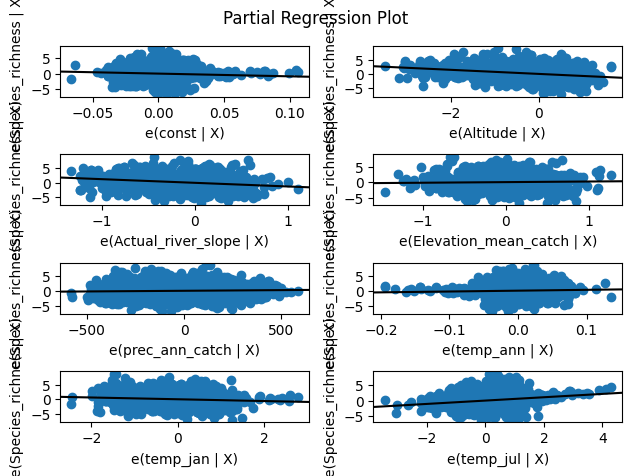

In [54]:
#compare coefficients

# formula: response ~ predictor1 + predictor2 + ...
model = smf.ols(formula='species_richness ~ altitude + actual_river_slope + elevation_mean_catch + prec_annual_catch + temp_annual + temp_january + temp_july', data=df).fit()
print_model = model.summary()
print(print_model)


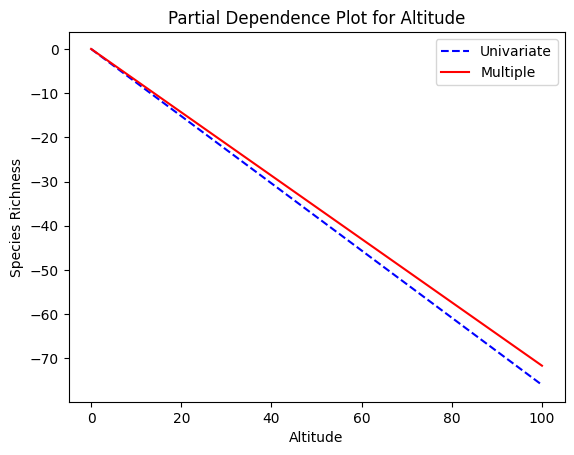

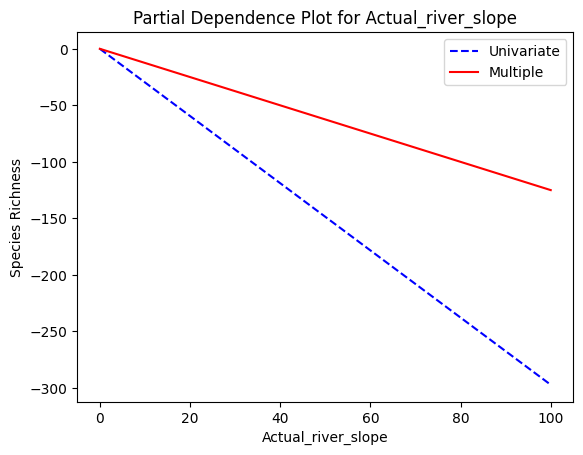

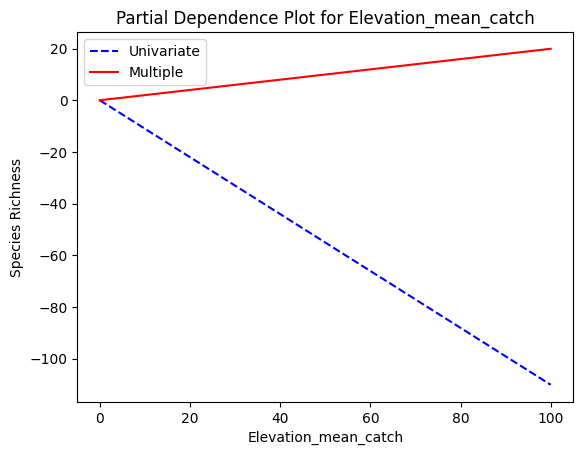

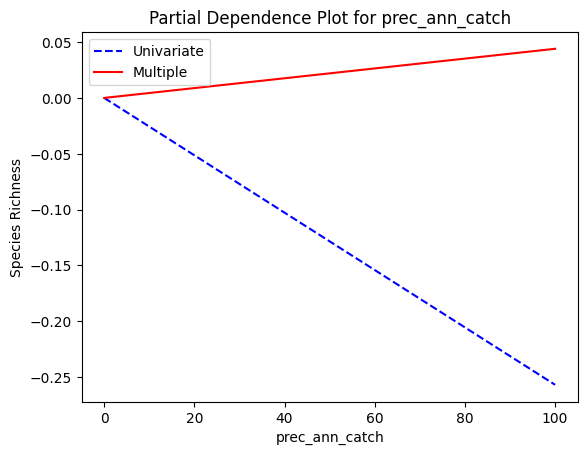

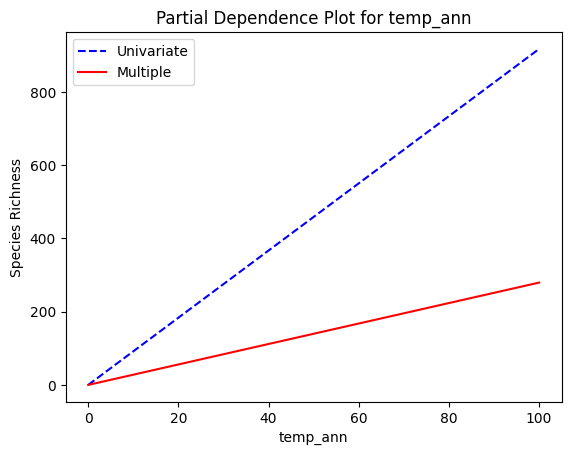

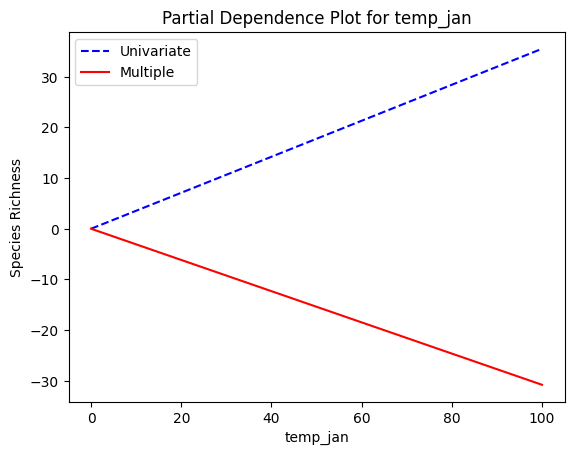

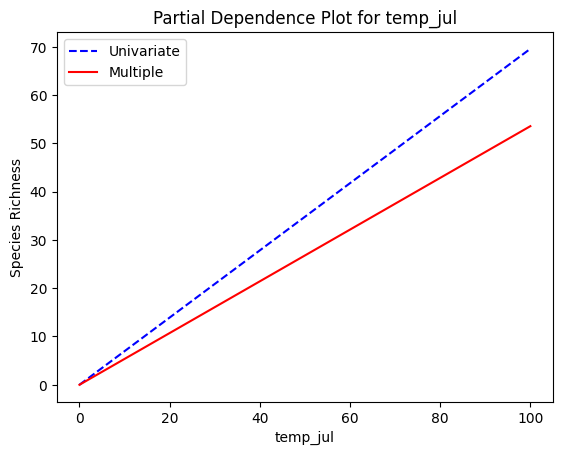

In [55]:
#Plot the partial dependence plots to compare responses with the previous single effects.
# don't love these results...
import numpy as np
import matplotlib.pyplot as plt

# Univariate Regression Coefficients
univariate_coefficients = {
    'Altitude': -0.7602902582636738,
    'Actual_river_slope': -2.9718577694980537,
    'Elevation_mean_catch': -1.1014945697455747,
    'prec_ann_catch': -0.0025688326482089818,
    'temp_ann': 9.1747543539085,
    'temp_jan': 0.35528305165056895,
    'temp_jul': 0.6957113106075024
}

# Multiple Regression Coefficients
multiple_coefficients = {
    'Altitude': -0.716798,
    'Actual_river_slope': -1.250028,
    'Elevation_mean_catch': 0.199325,
    'prec_ann_catch': 0.000440,
    'temp_ann': 2.794367,
    'temp_jan': -0.308029,
    'temp_jul': 0.535482
}


# Range of values for each predictor variable
var_values = np.linspace(0, 100, 100)  # Adjust the range as needed

# Plot partial dependence plots for each predictor variable
for var in univariate_coefficients.keys():
    # Compute the partial dependence values using the coefficients
    univariate_pdp_values = univariate_coefficients[var] * var_values
    multiple_pdp_values = multiple_coefficients[var] * var_values

    # Plot the partial dependence curve
    plt.plot(var_values, univariate_pdp_values, label='Univariate', color='blue', linestyle='--')
    plt.plot(var_values, multiple_pdp_values, label='Multiple', color='red')

    # Label the axes and add a title
    plt.xlabel(var)
    plt.ylabel("Species Richness")
    plt.title(f"Partial Dependence Plot for {var}")

    # Add legend and show plot
    plt.legend()
    plt.show()


Check the multicolinearity among the predictor variables and run a second more parsimonious regression model. Check how the coefficients have changed.

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor variable
vif_data = df2[continuous_vars]
vif_data = sm.add_constant(vif_data)  # Adding a constant column for intercept
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)
print("VIF:")
print(vif_series)

# Select predictor variables with VIF less than a threshold (e.g., 5)
selected_vars = vif_series[vif_series < 5].index.tolist()

# Fit a more parsimonious regression model
X_selected = df2[selected_vars]  # Selected predictor variables
X_selected = sm.add_constant(X_selected)  # Adding a constant column for intercept
parsimonious_model = sm.OLS(y, X_selected).fit()

# Print the summary of the parsimonious regression model
print("Parsimonious Regression Model Summary:")
print(parsimonious_model.summary())

# Compare the coefficients between the multiple regression and the parsimonious regression
print("Multiple Regression Coefficients:")
print(multiple_coefficients)
print("\nParsimonious Regression Coefficients:")
print(parsimonious_model.params[1:])  # Exclude the intercept


VIF:
const                   5051.759156
Altitude                   2.981850
Actual_river_slope         1.372946
Elevation_mean_catch       4.641496
prec_ann_catch             1.602298
temp_ann                  27.327270
temp_jan                  18.938431
temp_jul                   8.238264
dtype: float64
Parsimonious Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:       Species_richness   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     286.9
Date:                Thu, 09 May 2024   Prob (F-statistic):          3.99e-207
Time:                        20:41:55   Log-Likelihood:                -6030.7
No. Observations:                2822   AIC:                         1.207e+04
Df Residuals:                    2817   BIC:                         1.210e+04
Df Model:            

In [57]:
# Code to produce functions to run diagnostic plots  
# https://www.statsmodels.org/dev/examples/notebooks/generated/linear_regression_diagnostics_plots.html

# base code
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type
import statsmodels

style_talk = 'default'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """


    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)


    def __call__(self, plot_context='default'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax



    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax


    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

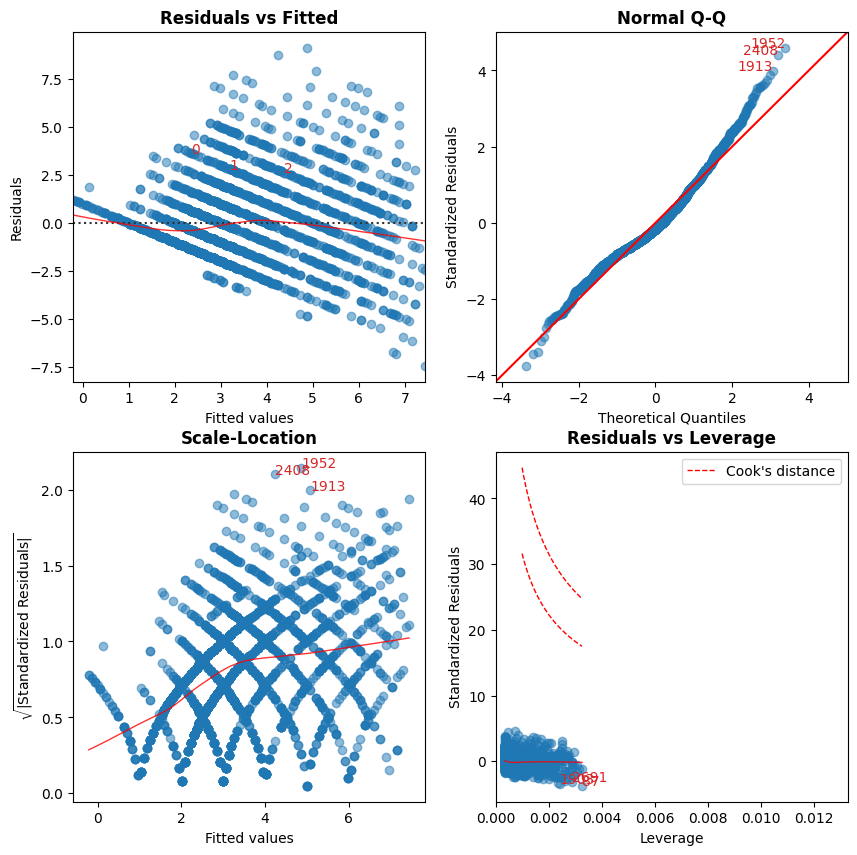

   Features  VIF Factor
1  temp_jul        1.00
0     const       98.26


In [58]:
cls = Linear_Reg_Diagnostic(model)
fig, ax = cls()